In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
target = ais_example.AnnealingTarget(annealing_steps=200, batch_shape=(100,))

In [6]:
ais = ais_example.annealed_importance(target, kernel.GaussianKernel('AnnealingTarget', 'X_0', scale=2.0), moves=200)

In [7]:
annealed_points, trace, log_weight = ais()

In [8]:
import matplotlib.pyplot as plt
from torch.distributions import Normal

In [9]:
sample = torch.linspace(-10, 10, 100)
sample_probs = Normal(loc=torch.ones(1) * 3, scale=torch.ones(1) / 4).log_prob(sample).exp()

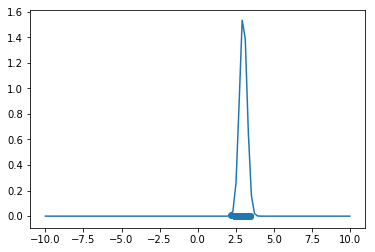

In [10]:
plt.scatter(annealed_points.detach().numpy(), log_weight.exp())
plt.plot(sample.detach().numpy(), sample_probs.detach().numpy())

In [11]:
annealed_points

tensor([3.4516, 2.5918, 2.9086, 2.9086, 2.5833, 2.5453, 2.7160, 3.2202, 2.5833,
        2.5833, 2.9644, 2.9644, 2.5833, 3.0700, 2.5918, 2.9086, 2.5453, 2.5918,
        3.1816, 3.1167, 3.1982, 3.1816, 2.8723, 3.0700, 2.9086, 3.4098, 3.2628,
        2.5918, 3.2628, 2.5918, 2.9086, 3.0700, 3.4563, 3.0700, 2.9644, 2.9644,
        2.5453, 2.5918, 3.2554, 2.9644, 2.7160, 2.5453, 2.5833, 3.0700, 3.2202,
        2.4304, 2.5453, 2.5833, 3.2628, 2.5833, 2.9644, 2.7160, 2.1635, 3.0700,
        2.5833, 2.5918, 2.5833, 2.7160, 2.9644, 2.9086, 2.9086, 3.3521, 2.9086,
        2.7160, 2.9644, 3.1816, 2.9086, 2.4304, 2.9086, 3.2554, 2.5833, 2.8723,
        3.1816, 2.7160, 2.9644, 2.7160, 2.8723, 2.5918, 2.8723, 3.0700, 2.4304,
        2.8723, 2.5833, 2.7160, 2.8723, 2.5918, 2.9086, 3.1167, 2.8723, 2.4304,
        3.2628, 3.2202, 3.1816, 3.1816, 2.8723, 3.1816, 2.5918, 2.5918, 3.1167,
        2.4304])

In [12]:
log_weight

tensor([-1504.6849, -1026.4868,  -115.1099, -1274.9784,  -337.6727,  -275.5338,
        -1334.3756,  -468.5168, -1561.9540, -1023.8796,  -647.2771,  -891.8556,
         -747.7423,  -795.6306,  -310.1716,  -615.2143,  -418.4622, -1011.1089,
        -1004.3877,  -619.8002,  -481.3037,  -557.2946,  -730.4116,  -498.7650,
        -1615.8185,  -678.3578,  -206.2448,  -627.3015, -1055.6187,  -640.0431,
         -597.9260, -1301.4529,  -972.2427,  -646.3692,  -379.8051, -1519.3824,
         -764.5388,  -840.1979, -1399.8593,  -702.6642,  -838.9931,  -543.9776,
         -954.0566,  -596.9593, -1826.6505, -1149.0197,  -520.5046, -1023.1819,
        -1361.0071, -1506.1777,  -483.7529, -1213.5249,    -4.6052,  -925.5590,
        -1045.2670,  -858.2974,  -406.2123, -1288.6505,  -530.6011,  -969.1282,
         -966.3917,  -897.3083,  -676.2756, -1235.9615,  -771.9922,  -686.4807,
        -1275.4316, -1136.3344, -1162.2811,  -800.1711, -1162.5239,  -892.9766,
         -583.9436,  -629.6329,  -980.15